In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
w0 = random.uniform(-0.25, 0.25);
w1 = random.uniform(-1,1);
w2 = random.uniform(-1,1);

In [4]:
S = []
for i in range(0,100):
    S.append([random.uniform(-1,1),random.uniform(-1,1)])

In [5]:
tempWeightVector = np.transpose(np.array([w0,w1,w2]))

In [6]:
S1 = [];
S0 = [];
zero_plot = [];
unitVector = [1];
for vector in S:
    tempVector = unitVector + vector;
    if(np.dot(tempVector,tempWeightVector) >= 0):
        S1.append(tempVector);
    
    if(np.dot(tempVector,tempWeightVector) < 0):
        S0.append(tempVector);  

In [7]:
S0_X_COORDINATE = [];
S0_Y_COORDINATE = [];

S1_X_COORDINATE = [];
S1_Y_COORDINATE = [];

for element in S0:
    S0_X_COORDINATE.append(element[1]);
    S0_Y_COORDINATE.append(element[2]);

for element in S1:
    S1_X_COORDINATE.append(element[1]);
    S1_Y_COORDINATE.append(element[2]);    

In [8]:
#Line Co-ordinates: w0 + w1X1 + w2X2
#When X2 = 1
X11 = -(w0 + w2)/w1;
#When X2 = -1
X12 = (-w0 + w2)/w1;

Line_X_Coordinates = [X11,X12];
Line_Y_Coordinates = [1,-1];

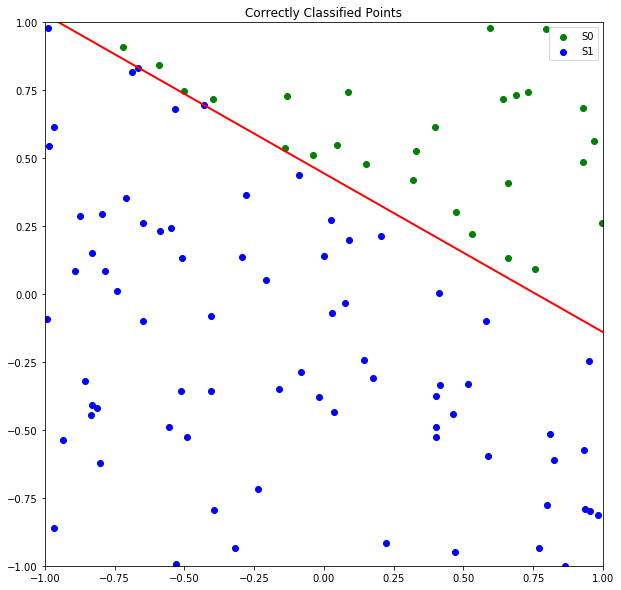

In [9]:
figure, axis = plt.subplots(figsize=(10,10));
S0_Plot = plt.scatter(S0_X_COORDINATE, S0_Y_COORDINATE, c ='green', label='S0');
S1_Plot = plt.scatter(S1_X_COORDINATE, S1_Y_COORDINATE, c ='blue', label='S1');
plt.title('Correctly Classified Points');
plt.legend(loc="upper right");
axis.plot(Line_X_Coordinates,Line_Y_Coordinates, 'r', label='Correct Classifier', linewidth=2)
plt.ylim([-1,1]);
plt.xlim([-1,1]);
plt.show();

In [10]:
#Let's assume the Class of vectors in S1 as 0
for element in S1:
    element.extend([0]);
    
#Let's assume the Class of vectors in S0 as 1
for element in S0:
    element.extend([1]);

In [11]:
def step_function(x):
    y = 1 if x >=0 else 0;
    return y;

In [22]:
def countMissClassifiedPoints(input_vectors,weights):
    missclassified_points = 0;
    for element in input_vectors:
        if(step_function(np.dot(element[:3],weights)) >= 0):
            predicted_label = 0;
        else:
            predicted_label = 1;
        actual_label = element[3]
        if(predicted_label != actual_label):
            missclassified_points = missclassified_points + 1;
    
    return missclassified_points;    

In [23]:
new_W0 = random.uniform(-1,1);
new_W1 = random.uniform(-1,1);
new_W2 = random.uniform(-1,1);

newWeightVector = np.transpose(np.array([new_W0,new_W1,new_W2]))
total_vectors = S0 + S1;
print ("Number of Miss-Classified Points: ", countMissClassifiedPoints(total_vectors,newWeightVector));

('Number of Miss-Classified Points: ', 27)


In [24]:
def perceptron_training_algorithm(total_vectors,weight_vector,learning_rate):
    epoch = 0;
    weights = [];
    count = 0;
    delta = 1;
    missclassified_points_list = [];
    while (countMissClassifiedPoints(total_vectors,weight_vector) != 0):
        missClassifiedPoints = countMissClassifiedPoints(total_vectors,weight_vector);
        missclassified_points_list.append(missClassifiedPoints);
        epoch = epoch + 1;
        if(epoch == 100):
            break;
        for vector in total_vectors:
            predicted_label = step_function(np.dot(vector[:3],weight_vector));
            actual_label = vector[3];
            delta = actual_label - predicted_label;
            if delta != 0:
                temp = vector[:3];
                temp[0] = temp[0]*learning_rate*delta;
                temp[1] = temp[1]*learning_rate*delta;
                temp[2] = temp[2]*learning_rate*delta;
                weight_vector[0] = weight_vector[0] + temp[0];
                weight_vector[1] = weight_vector[1] + temp[1];
                weight_vector[2] = weight_vector[2] + temp[2];                              
        weights.append(weight_vector);            
    return epoch, weights, missclassified_points_list;

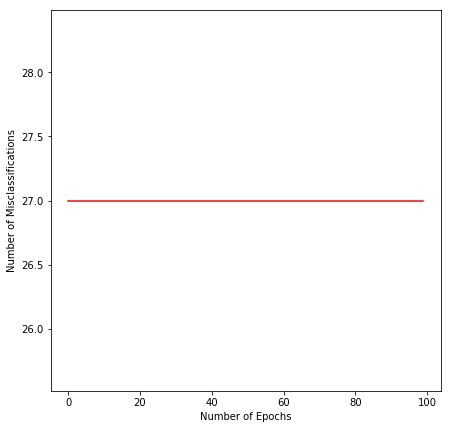

In [27]:
new_W0 = random.uniform(-1,1);
new_W1 = random.uniform(-1,1);
new_W2 = random.uniform(-1,1);
weight_vector = np.transpose(np.array([new_W0,new_W1,new_W2]));
learning_rate = 1;
total_vectors = S0 + S1;
epoch, weights, missclassified_points_list = perceptron_training_algorithm(total_vectors,weight_vector,learning_rate);
num_epoch = range(len(weights)+1);
figure, axis = plt.subplots(figsize=(7,7));
axis.plot(num_epoch,missclassified_points_list, 'r');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();

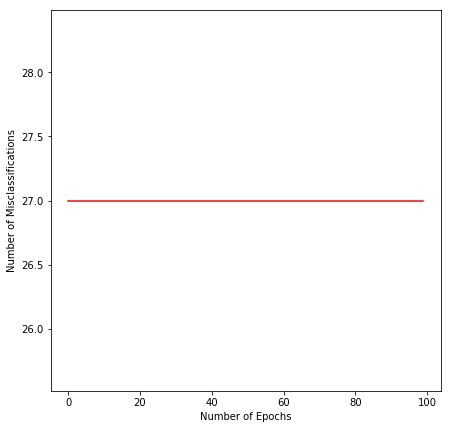

In [28]:
new_W0 = random.uniform(-1,1);
new_W1 = random.uniform(-1,1);
new_W2 = random.uniform(-1,1);
weight_vector = np.transpose(np.array([new_W0,new_W1,new_W2]));
learning_rate = 10;
total_vectors = S0 + S1;
epoch, weights, missclassified_points_list = perceptron_training_algorithm(total_vectors,weight_vector,learning_rate);
num_epoch = range(len(weights)+1);
figure, axis = plt.subplots(figsize=(7,7));
axis.plot(num_epoch,missclassified_points_list, 'r');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();

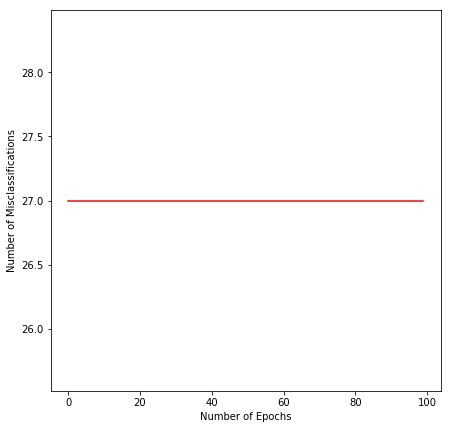

In [29]:
weight_vector = np.transpose(np.array([new_W0,new_W1,new_W2]));
learning_rate = 0.1;
total_vectors = S0 + S1;
epoch, weights, missclassified_points_list = perceptron_training_algorithm(total_vectors,weight_vector,learning_rate);
num_epoch = range(len(weights)+1);
figure, axis = plt.subplots(figsize=(7,7));
axis.plot(num_epoch,missclassified_points_list, 'r');
plt.ylabel('Number of Misclassifications');
plt.xlabel('Number of Epochs');
plt.show();